In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/enhanced_box_office_data(2000-2024)u.csv")
df

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,196,Devara Part 1,7361414.0,5600000.0,76.1,1761414.0,23.9,2024,"Action, Drama",7.0/10,30.0,te,India
4996,197,Kolpaçino 4 4'lük,7343114.0,0.0,0.0,7343114.0,100.0,2024,Comedy,4.0/10,4.0,tr,Turkey
4997,198,Lim Young Woong: Im Hero the Stadium,7305588.0,0.0,0.0,7305588.0,100.0,2024,"Music, Documentary",0.0/10,0.0,ko,South Korea
4998,199,Yolo,7241561.0,2001584.0,27.6,5239977.0,72.4,2024,"Drama, Comedy, Action",6.3/10,70.0,zh,China


In [3]:
df.describe()

,Rank,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Vote_Count
count,5000.00000,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,4830.000000
mean,100.50000,1.192137e+08,4.472523e+07,35.740620,7.448809e+07,64.256640,2012.000000,2531.585921
std,57.74008,2.005243e+08,7.727026e+07,30.656992,1.334932e+08,30.654531,7.211824,3946.272827
min,1.00000,1.666028e+06,0.000000e+00,0.000000,0.000000e+00,0.000000,2000.000000,0.000000
25%,50.75000,2.466220e+07,9.275150e+04,0.200000,1.371034e+07,42.200000,2006.000000,205.250000
50%,100.50000,4.844658e+07,1.798421e+07,37.050000,3.019444e+07,62.950000,2012.000000,1035.500000
75%,150.25000,1.197588e+08,5.386847e+07,57.800000,7.211578e+07,99.800000,2018.000000,3065.000000
max,200.00000,2.799439e+09,9.366622e+08,100.000000,1.993811e+09,100.000000,2024.000000,36753.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


In [5]:

df = df.drop(columns=['Movie Title'], errors='ignore')


columns_to_numeric = ['$Worldwide', '$Domestic', '$Foreign', 'Vote_Count', 'Rating']
for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(df.median(numeric_only=True), inplace=True)

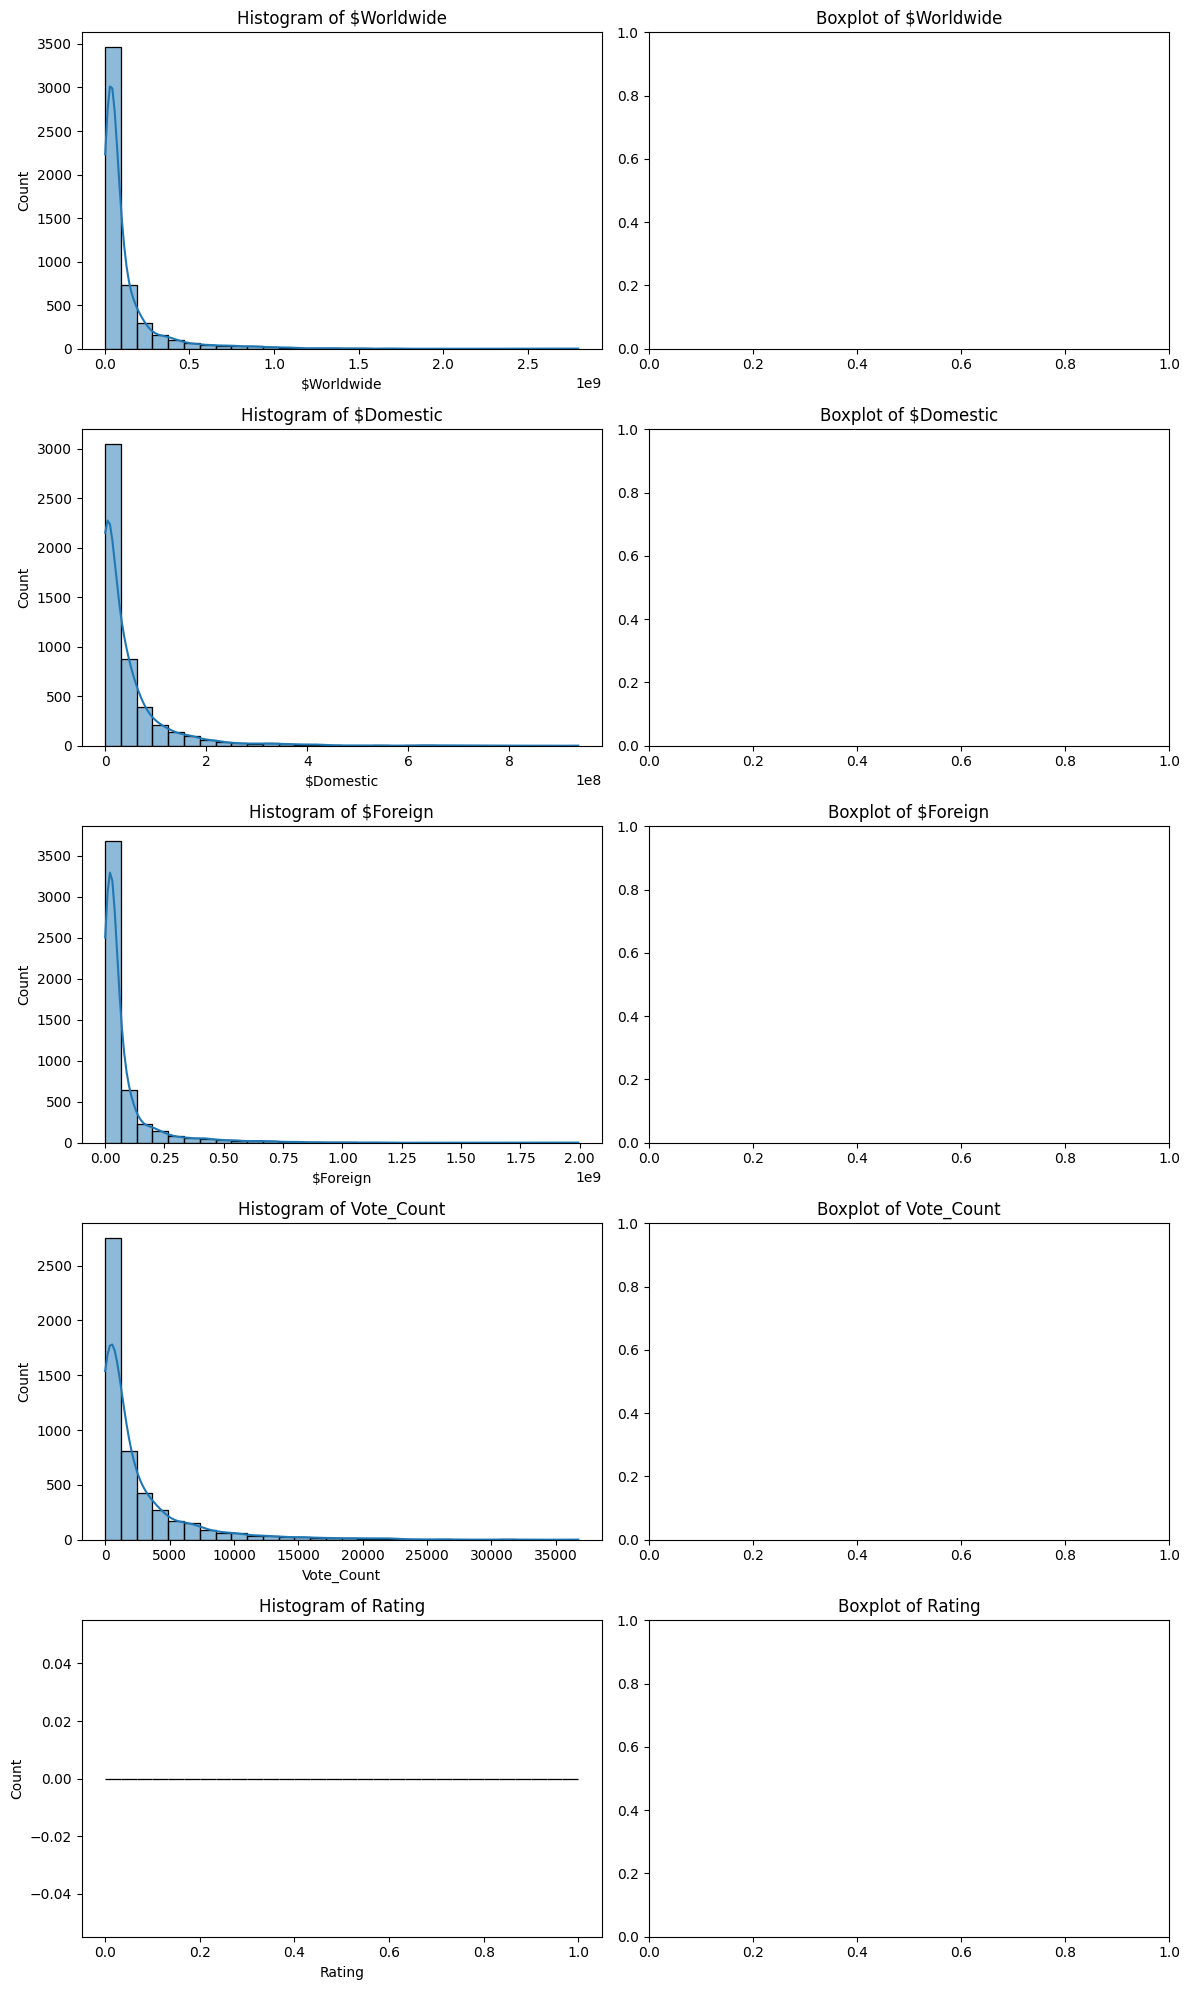

In [6]:
# Histogram & Box Plot Before Outlier Removal
import matplotlib.pyplot as plt
numerical_cols = ['$Worldwide', '$Domestic', '$Foreign', 'Vote_Count', 'Rating']

fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 20))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}')

    # Specify 'y' instead of 'x' for a vertical boxplot of a single column
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [7]:
# Outlier Removal using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()
for col in numerical_cols:
    df_cleaned = remove_outliers(df_cleaned, col)

print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")

Original dataset size: 5000
Cleaned dataset size: 0


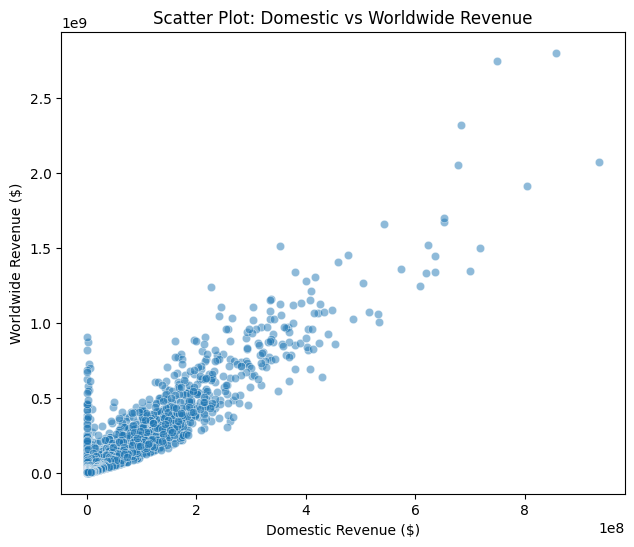

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df["$Domestic"], y=df["$Worldwide"], alpha=0.5)
plt.xlabel("Domestic Revenue ($)")
plt.ylabel("Worldwide Revenue ($)")
plt.title("Scatter Plot: Domestic vs Worldwide Revenue")
plt.show()

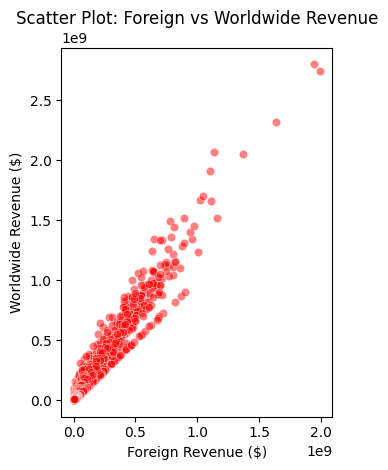

In [9]:
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["$Foreign"], y=df["$Worldwide"], alpha=0.5, color="red")
plt.xlabel("Foreign Revenue ($)")
plt.ylabel("Worldwide Revenue ($)")
plt.title("Scatter Plot: Foreign vs Worldwide Revenue")

plt.tight_layout()
plt.show()

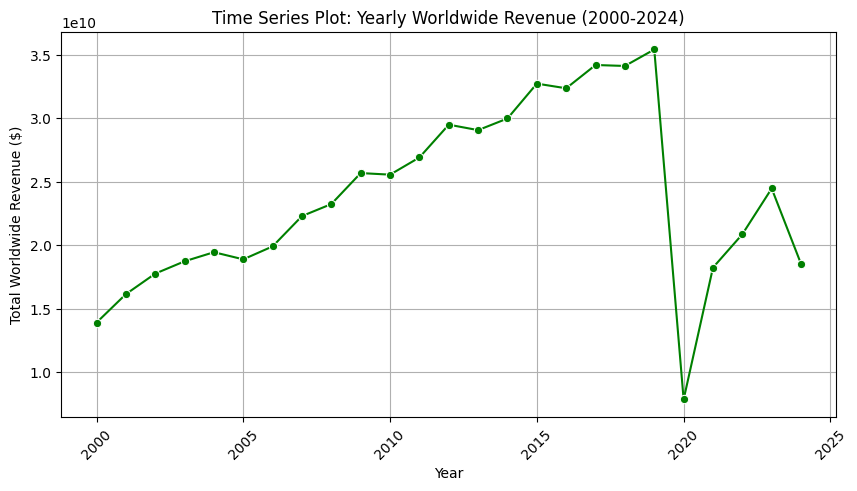

In [10]:
yearly_revenue = df.groupby("Year")["$Worldwide"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_revenue["Year"], y=yearly_revenue["$Worldwide"], marker="o", color="green")
plt.xlabel("Year")
plt.ylabel("Total Worldwide Revenue ($)")
plt.title("Time Series Plot: Yearly Worldwide Revenue (2000-2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [11]:
from scipy.stats import skew, kurtosis

numerical_cols = ['$Worldwide', '$Domestic', '$Foreign', 'Vote_Count', 'Rating']

for col in numerical_cols:
    print(f"Skewness of {col}: {skew(df_cleaned[col])}")
    print(f"Kurtosis of {col}: {kurtosis(df_cleaned[col])}")

Skewness of $Worldwide: nan
Kurtosis of $Worldwide: nan
Skewness of $Domestic: nan
Kurtosis of $Domestic: nan
Skewness of $Foreign: nan
Kurtosis of $Foreign: nan
Skewness of Vote_Count: nan
Kurtosis of Vote_Count: nan
Skewness of Rating: nan
Kurtosis of Rating: nan


<ipython-input-11-7e3fae120873>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(f"Skewness of {col}: {skew(df_cleaned[col])}")
<ipython-input-11-7e3fae120873>:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  print(f"Kurtosis of {col}: {kurtosis(df_cleaned[col])}")


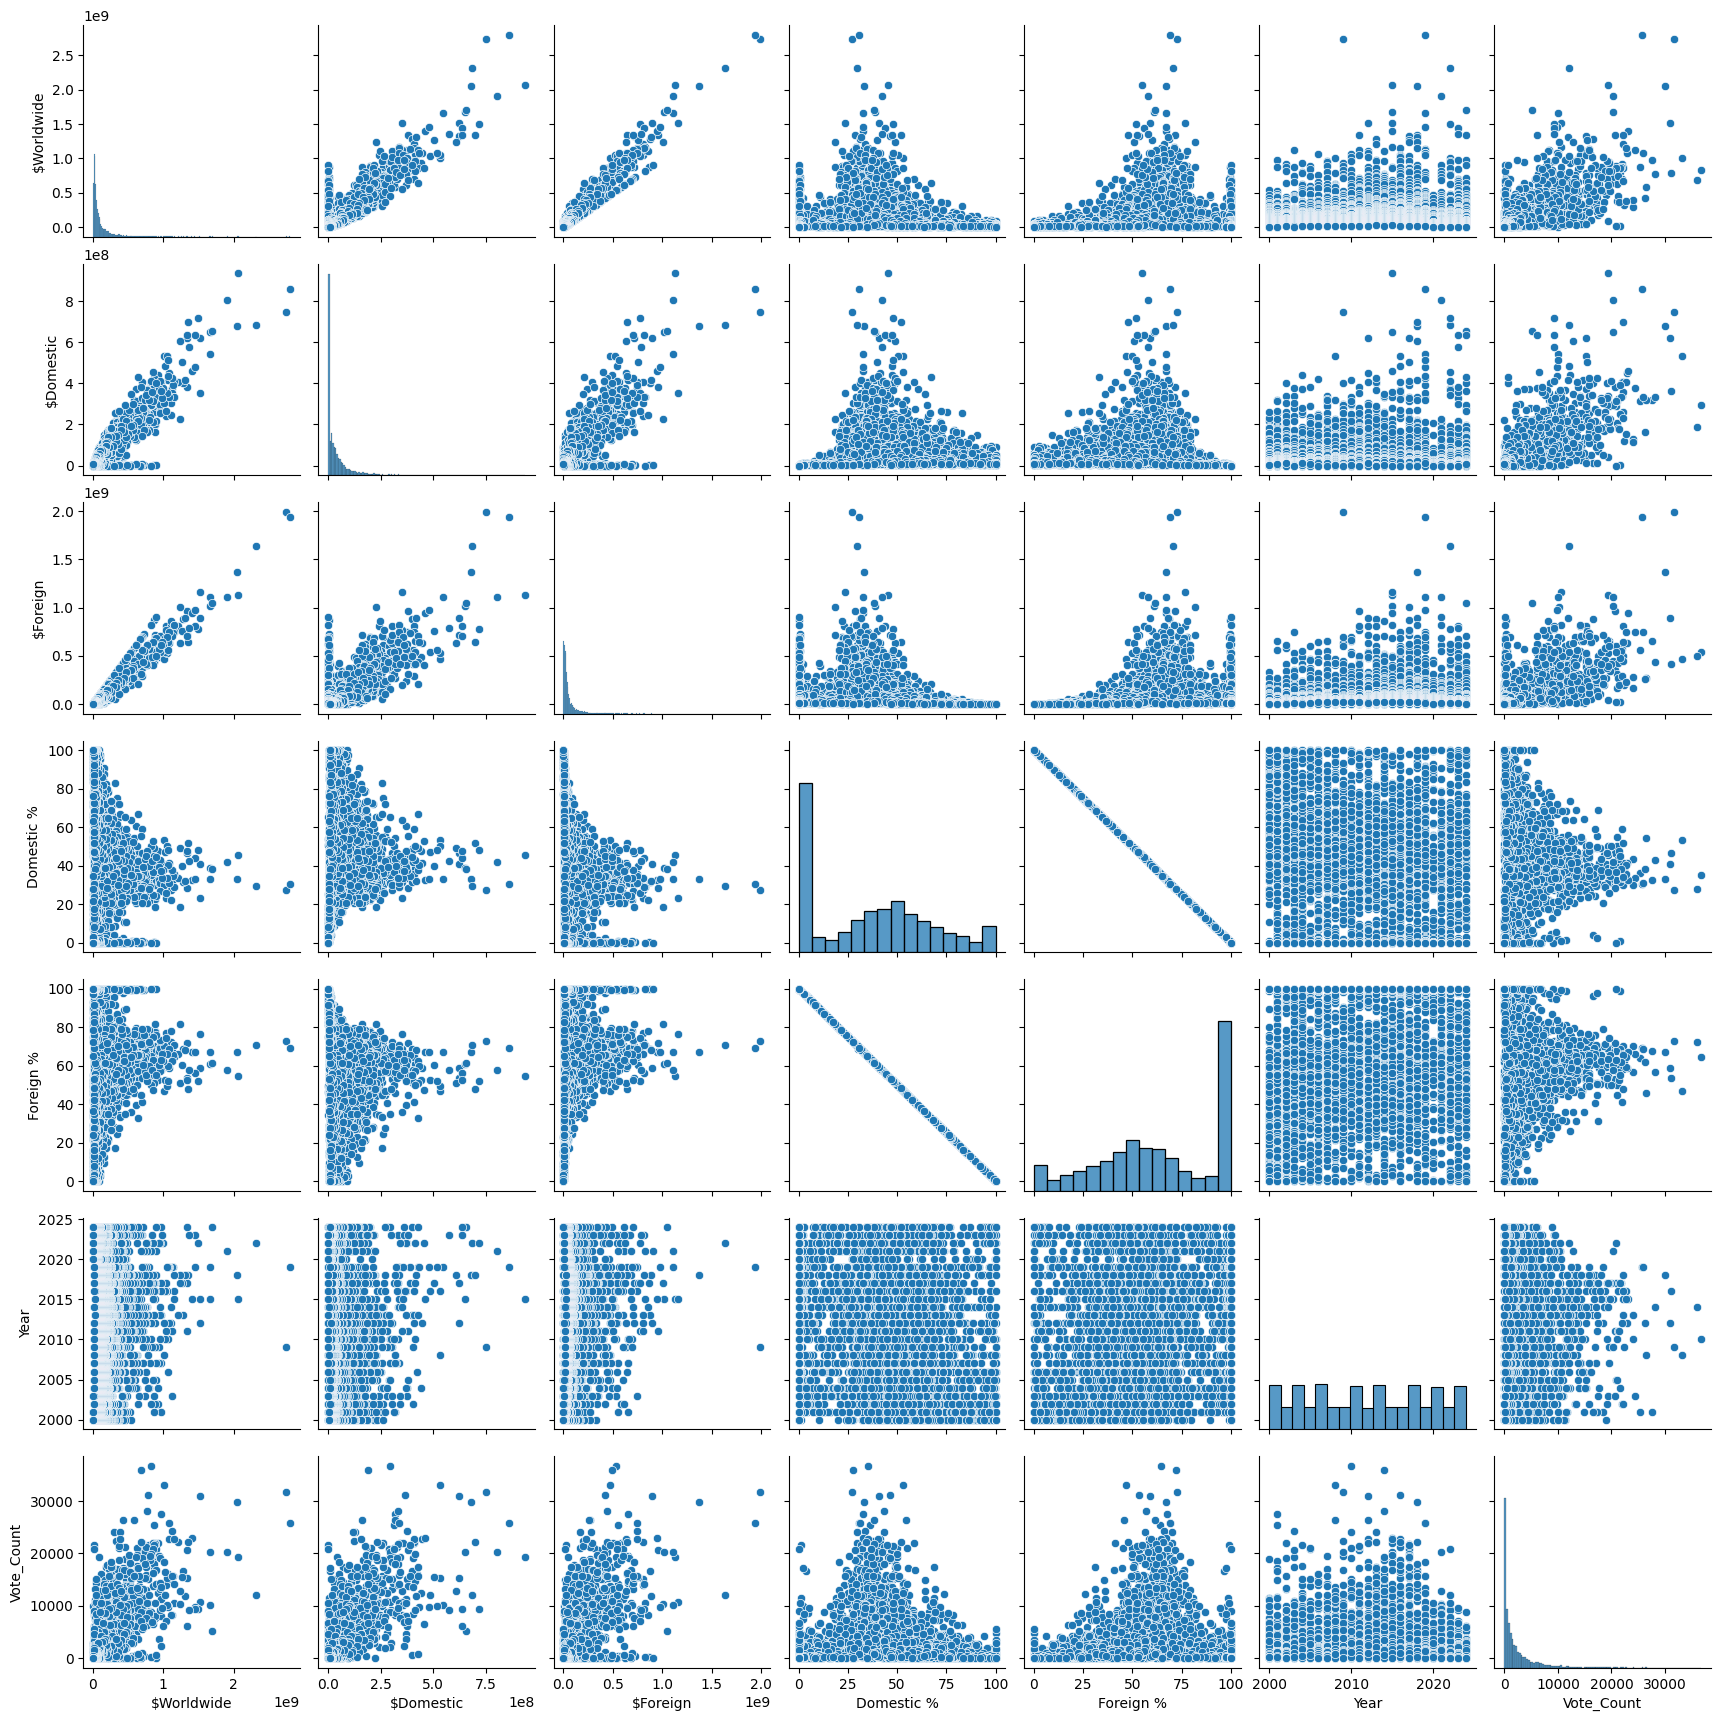

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/enhanced_box_office_data(2000-2024)u.csv")

# Clean numeric columns with $ and % signs
df['$Worldwide'] = df['$Worldwide'].replace('[\$,]', '', regex=True).astype(float)
df['$Domestic'] = df['$Domestic'].replace('[\$,]', '', regex=True).astype(float)
df['$Foreign'] = df['$Foreign'].replace('[\$,]', '', regex=True).astype(float)

df['Domestic %'] = df['Domestic %'].replace('%', '', regex=True).astype(float)
df['Foreign %'] = df['Foreign %'].replace('%', '', regex=True).astype(float)

# Ensure Rank, Year, and Vote_Count are numeric (some might be object if there are nulls or dirty values)
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

# Select relevant numeric columns
numeric_cols = ['$Worldwide', '$Domestic', '$Foreign', 'Domestic %', 'Foreign %', 'Year', 'Vote_Count']
df_numeric = df[numeric_cols].dropna()

# Create pairplot
sns.pairplot(df_numeric)
plt.show()


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'Rank' column from numerical_cols
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'Rank']  # Exclude 'Rank'

# Further filter numerical_cols to exclude columns with single unique value
numerical_cols = [col for col in numerical_cols if df_cleaned[col].nunique() > 1]

plt.figure(figsize=(15, 10))  # Adjust figsize as needed

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Arrange plots in a grid
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

Numerical columns: ['Rank', '$Worldwide', '$Domestic', 'Domestic %', '$Foreign', 'Foreign %', 'Year', 'Rating', 'Vote_Count']


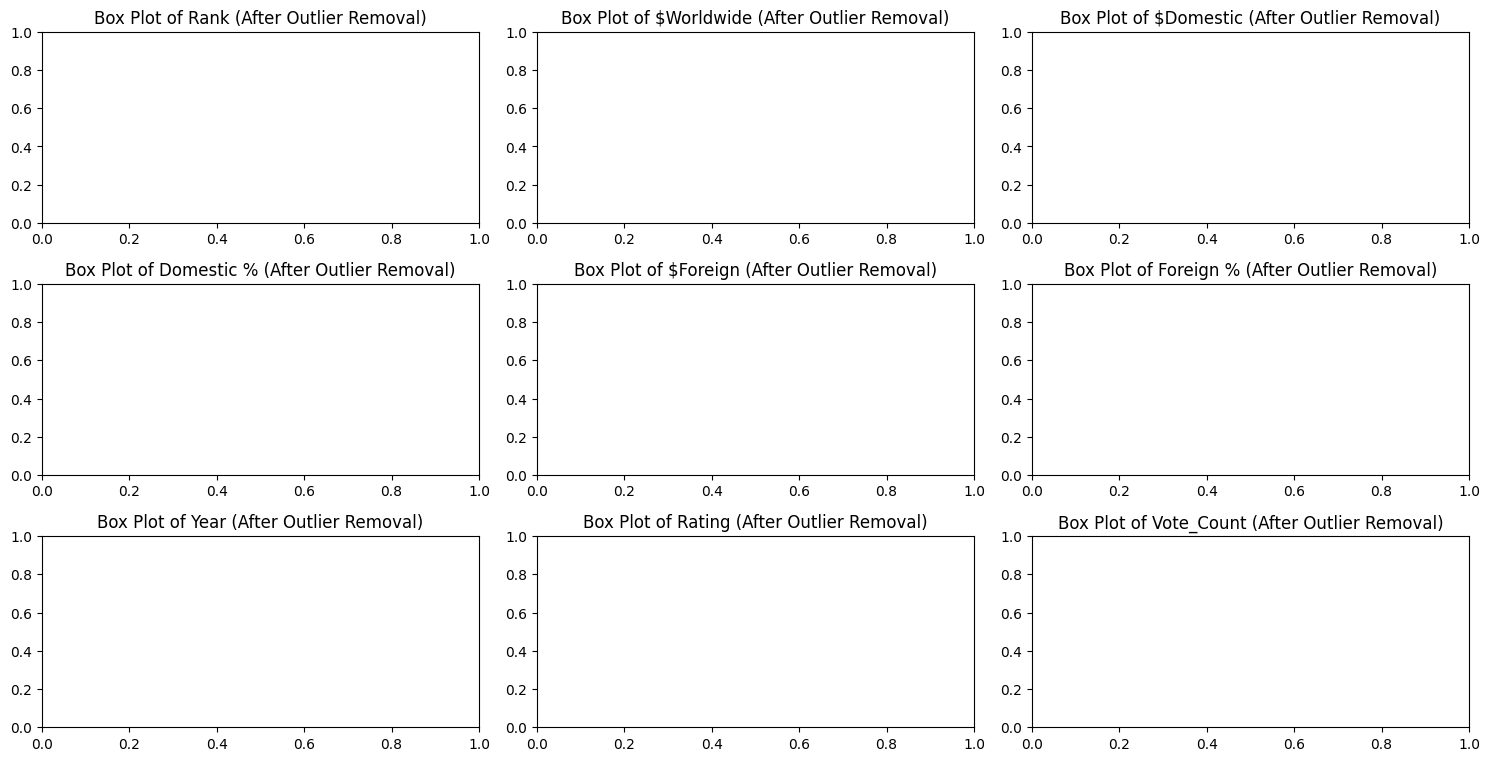

Original dataset size: 5000
Cleaned dataset size: 0


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# If there are no numerical columns, print a message
if not numerical_cols:
    print("No numerical columns found in the dataset!")
else:
    print(f"Numerical columns: {numerical_cols}")

# Function to remove outliers using IQR
def remove_outliers(df, columns, multiplier=3.0):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(df, numerical_cols, multiplier=3.0)

# Plot box plots AFTER outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Box Plot of {col} (After Outlier Removal)")

plt.tight_layout()
plt.show()

# Print dataset sizes before and after outlier removal
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")


In [23]:
X = df[["$Domestic", "$Foreign"]]
y = df["$Worldwide"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [24]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\nMean Absolute Error: {mae}\nMean Squared Error: {mse}\nR² Score: {r2}")

Model Performance:
Mean Absolute Error: 494.19992001567107
Mean Squared Error: 633837.3673818816
R² Score: 0.9999999999864145


In [26]:
# Train & Compare Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }


                            MAE           MSE  R2 Score
Linear Regression  4.941999e+02  6.338374e+05  1.000000
Decision Tree      4.121791e+06  4.734640e+14  0.989852
Random Forest      2.196674e+06  1.219881e+14  0.997385


<ipython-input-27-2c8b75495b0a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MAE"], ax=axes[0], palette="coolwarm")
<ipython-input-27-2c8b75495b0a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["MSE"], ax=axes[1], palette="coolwarm")
<ipython-input-27-2c8b75495b0a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R2 Score"], ax=axes[2], palette="coolwarm")


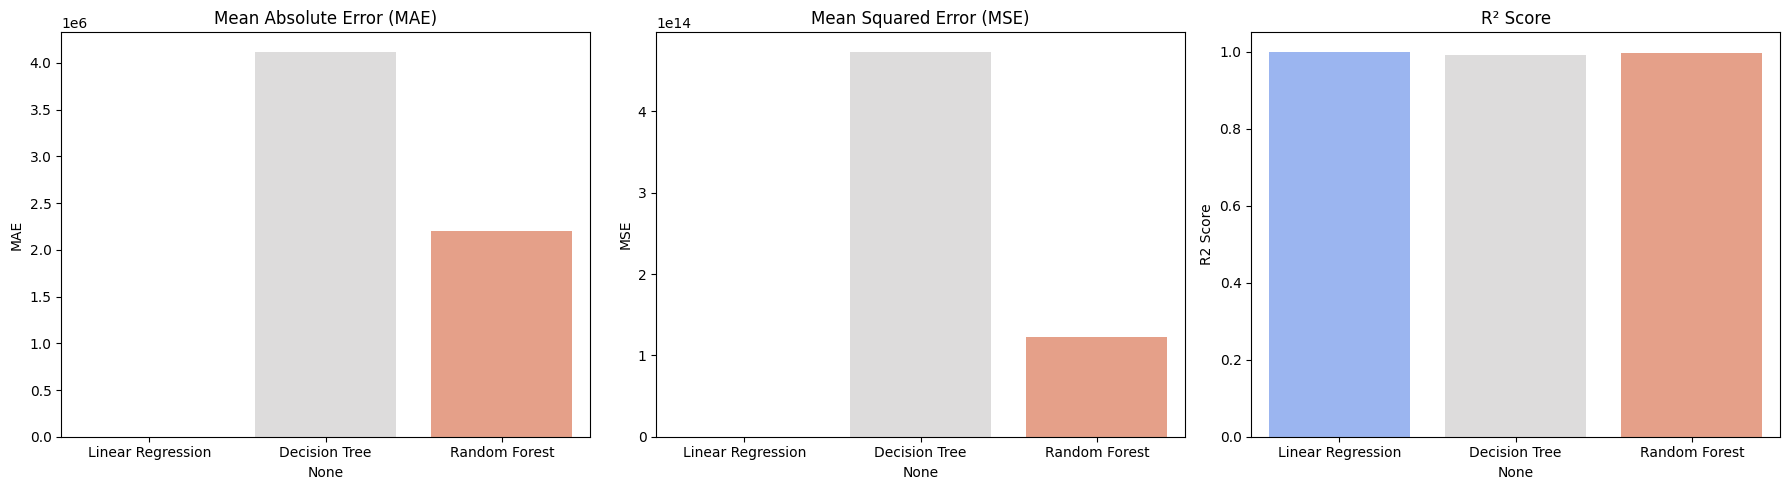

In [27]:
# Visualizing Model Performance
results_df = pd.DataFrame(results).T
print(results_df)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=results_df.index, y=results_df["MAE"], ax=axes[0], palette="coolwarm")
axes[0].set_title("Mean Absolute Error (MAE)")

sns.barplot(x=results_df.index, y=results_df["MSE"], ax=axes[1], palette="coolwarm")
axes[1].set_title("Mean Squared Error (MSE)")

sns.barplot(x=results_df.index, y=results_df["R2 Score"], ax=axes[2], palette="coolwarm")
axes[2].set_title("R² Score")

plt.tight_layout()
plt.show()

In [34]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

# Assuming '$Worldwide' represents the revenue
revenue_col = '$Worldwide'  # Change to the actual revenue column if different

# --- Preprocessing Revenue ---
# If the revenue column has currency symbols or commas, clean it first
df[revenue_col] = df[revenue_col].replace('[\$,]', '', regex=True).astype(float)

# --- Create Two Groups ---
group_before_2010 = df[df['Year'] < 2010][revenue_col].dropna()
group_after_2010 = df[df['Year'] >= 2010][revenue_col].dropna()

# --- Z-Test ---
z_stat, p_val_z = ztest(group_before_2010, group_after_2010)
print(f"Z-Test:\nZ-statistic = {z_stat:.3f}, P-value = {p_val_z:.4f}\n")

# --- T-Test ---
t_stat, p_val_t = stats.ttest_ind(group_before_2010, group_after_2010, equal_var=False)
print(f"T-Test:\nT-statistic = {t_stat:.3f}, P-value = {p_val_t:.4f}\n")

# --- Interpretation ---
alpha = 0.05
if p_val_t < alpha:
    print("Reject the null hypothesis: There is a significant difference in revenue between the two periods.")
else:
    print("Fail to reject the null hypothesis: No significant difference in revenue between the two periods.")

Z-Test:
Z-statistic = -6.114, P-value = 0.0000

T-Test:
T-statistic = -6.594, P-value = 0.0000

Reject the null hypothesis: There is a significant difference in revenue between the two periods.
